### Compare M2 Oxy/Fluor with Prawler at prescribed depths

Compare Oxygen at various depths to prawler oxygen and compare fluorometer at various depths.   
Include CTD Casts at check points if available.

In [93]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [95]:
server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

In [96]:
### prawler urls
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )

d.dataset_id='erddap_19bsitaepr2a_prawler'

d.variables =  [
 'profile_id',
 'Chlorophyll',
 'Turbidity',
 'latitude',
 'longitude',
 'depth',
 "time",
 'Oxy_Conc',
 'Oxy_Sat'
]

d.constraints = {
    'time>=': '2019-01-01T00:00:00Z',
    'time<=': '2019-10-10T00:00:00Z',
}

start_date = '2019-04-15'
end_date = '2019-10-01'

df = d.to_pandas(
    index_col='time (UTC)',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
).dropna()

df.sort_index(inplace=True)
df.columns = [x[1].split()[0] for x in enumerate(df.columns)]

df.head()

,profile_id,Chlorophyll,Turbidity,latitude,longitude,depth,Oxy_Conc,Oxy_Sat
time (UTC),,,,,,,,
2019-04-30 18:45:14+00:00,171,4.6726,0.6175,56.873,-164.065,2.90,356.57470,112.422110
2019-04-30 18:45:22+00:00,171,6.0756,0.5928,56.873,-164.065,3.01,356.82242,112.502050
2019-04-30 18:45:30+00:00,171,5.0996,0.5434,56.873,-164.065,3.55,356.57025,112.430890
2019-04-30 18:45:38+00:00,171,5.3924,0.6175,56.873,-164.065,3.86,356.67834,112.486680
2019-04-30 18:45:46+00:00,171,5.4412,0.5928,56.873,-164.065,4.19,356.61597,112.484024


In [97]:
### prawler urls
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )

d.dataset_id='datasets_Mooring_19bsm2a_preliminary'

d.variables =  [
 'timeseries_id',
 'Chlorophyll_Fluorescence',
 'latitude',
 'longitude',
 'depth',
 "time",
 'Oxygen_Saturation',
 'Oxygen_Concentration',
 'Instrument_Identifier'
]

d.constraints = {
    'time>=': '2019-01-01T00:00:00Z',
    'time<=': '2019-10-10T00:00:00Z',
}

start_date = '2019-04-15'
end_date = '2019-10-01'

dfm = d.to_pandas(
    index_col='time (UTC)',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
)

dfm.sort_index(inplace=True)
dfm.columns = [x[1].split()[0] for x in enumerate(dfm.columns)]

dfm.head()

,timeseries_id,Chlorophyll_Fluorescence,latitude,longitude,depth,Oxygen_Saturation,Oxygen_Concentration,Instrument_Identifier
time (UTC),,,,,,,,
2019-03-21 21:20:53+00:00,19bsm2a_ecoflsb_1837_0055m.dat,0.0584,57,195.930145,55.0,NaN,NaN,eco
2019-03-21 21:27:00+00:00,19bsm2a_ecoflsb_3718_0025m.dat,23.0584,57,195.930145,25.0,NaN,NaN,eco
2019-04-23 00:01:08+00:00,19bsm2a_s37_2333_0012m.asc,NaN,57,195.930145,12.0,NaN,NaN,s37
2019-04-23 01:01:08+00:00,19bsm2a_s37_2333_0012m.asc,NaN,57,195.930145,12.0,NaN,NaN,s37
2019-04-23 02:01:08+00:00,19bsm2a_s37_2333_0012m.asc,NaN,57,195.930145,12.0,NaN,NaN,s37


(0, 30)

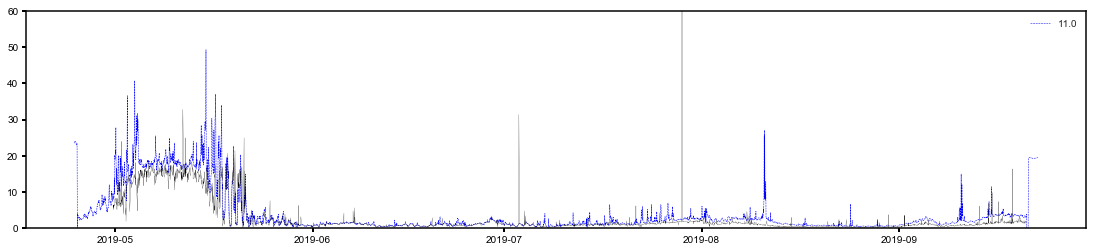

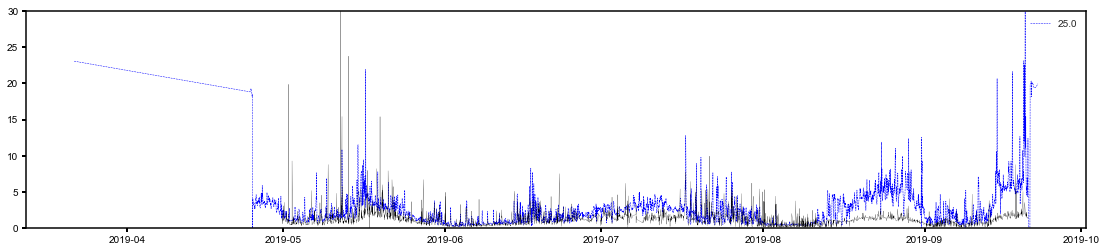

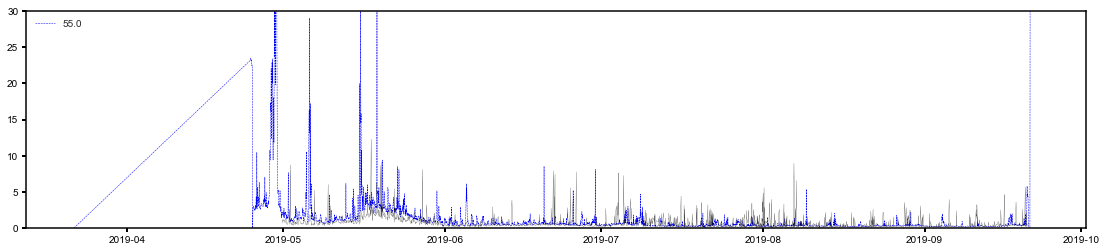

In [98]:
#11, 25, 55m
fig, ax = plt.subplots(figsize=(19, 4))

#plot mooring instruments
for name, group in dfm.groupby('timeseries_id'):
    if ('eco' in name) & ('11' in name):
        ax.plot(group.index,group.Chlorophyll_Fluorescence,'b--',linewidth=.5,label=group.depth[0])
        count += 1
plt.legend()

#plot prawler
ax.plot(df[(df.depth >11) & (df.depth < 13)].index,df[(df.depth >11) & (df.depth < 13)].Chlorophyll,'k',linewidth=.2)
ax.set_ylim([0,60])

#--
fig, ax = plt.subplots(figsize=(19, 4))

#plot mooring instruments
for name, group in dfm.groupby('timeseries_id'):
    if ('eco' in name) & ('25' in name):
        ax.plot(group.index,group.Chlorophyll_Fluorescence,'b--',linewidth=.5,label=group.depth[0])
        count += 1
plt.legend()

#plot prawler
ax.plot(df[(df.depth >24) & (df.depth < 26)].index,df[(df.depth >24) & (df.depth < 26)].Chlorophyll,'k',linewidth=.2)
ax.set_ylim([0,30])

#--
fig, ax = plt.subplots(figsize=(19, 4))

#plot mooring instruments
for name, group in dfm.groupby('timeseries_id'):
    if ('eco' in name) & ('55' in name):
        ax.plot(group.index,group.Chlorophyll_Fluorescence,'b--',linewidth=.5,label=group.depth[0])
        count += 1
plt.legend()

#plot prawler
ax.plot(df[(df.depth >45)].index,df[(df.depth >45)].Chlorophyll,'k',linewidth=.2)
ax.set_ylim([0,30])


(0, 60)

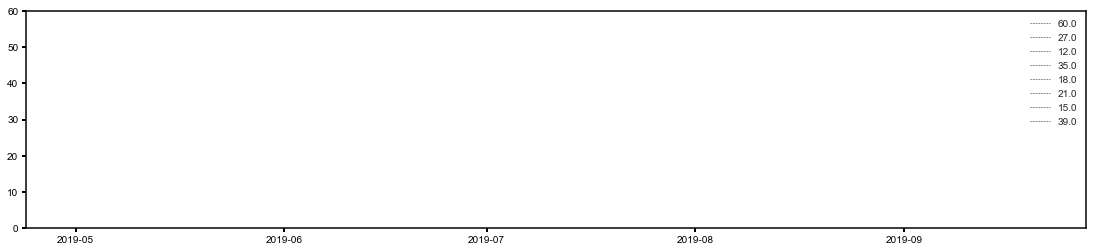

In [99]:
### Oxy Comparison

#11, 25, 55m
fig, ax = plt.subplots(figsize=(19, 4))

#plot mooring instruments
for name, group in dfm.groupby('timeseries_id'):
    if ('sc' in name):
        ax.plot(group.index,group.Oxygen_Concentration,'b--',linewidth=.5,label=group.depth[0])
        count += 1
plt.legend()

#plot prawler
ax.plot(df[(df.depth >11) & (df.depth < 13)].index,df[(df.depth >11) & (df.depth < 13)].Oxy_Conc,'k',linewidth=.2)
ax.set_ylim([0,60])


### Results

- all depths seem to agree for chlorophyll with exception of August on the 25m depth